**LAB 2**

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate
from thinkdsp import read_wave

In [17]:
some_wave = read_wave('./cats_dogs/train/cat/cat_1.wav')
some_wave.make_audio()

**SPECTROGRAM**

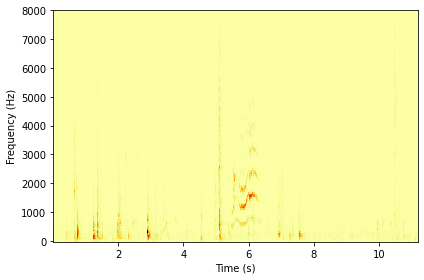

In [18]:
sp = some_wave.make_spectrogram(256)
sp.plot()
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

In [19]:
def plot_spectrogram(wave, seg_length):
    spectrogram = wave.make_spectrogram(seg_length)
    print('Time resolution (s)', spectrogram.time_res)
    print('Frequency resolution (Hz)', spectrogram.freq_res)
    spectrogram.plot(high=5000)
    decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')

If you increase the segment length, you get better frequency resolution, worse time resolution

Time resolution (s) 0.008
Frequency resolution (Hz) 125.0


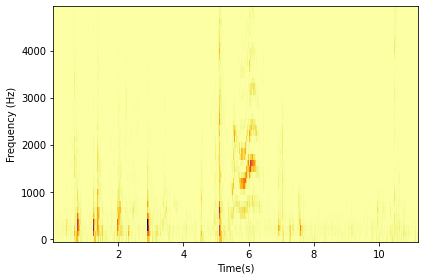

In [20]:
plot_spectrogram(some_wave, 128)

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.

**SPECTRUM**

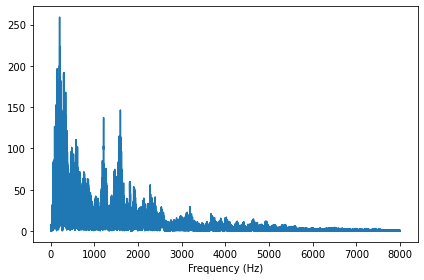

In [21]:
some_spectrum = some_wave.make_spectrum()

some_spectrum.plot()
decorate(xlabel='Frequency (Hz)')

**POWER PLOT**

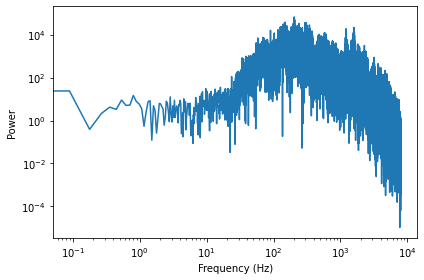

In [22]:
some_spectrum.plot_power()

loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)',
         ylabel='Power', 
         **loglog)

**Noise**

**Uncorrelated uniform (UU) noise**

In [23]:
# uncorrelated uniform (UU) noise

from thinkdsp import UncorrelatedUniformNoise

signal = UncorrelatedUniformNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
wave.make_audio()

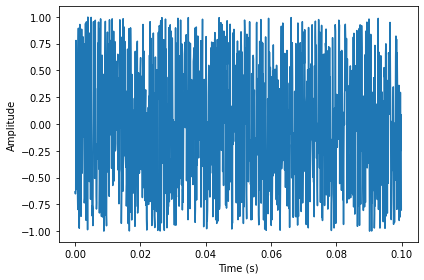

In [24]:
segment = wave.segment(duration=0.1)
segment.plot()
decorate(xlabel='Time (s)',
         ylabel='Amplitude')

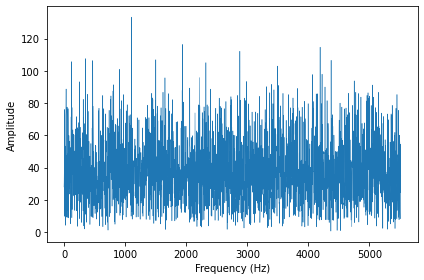

In [25]:
spectrum = wave.make_spectrum()
spectrum.plot(linewidth=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Amplitude')

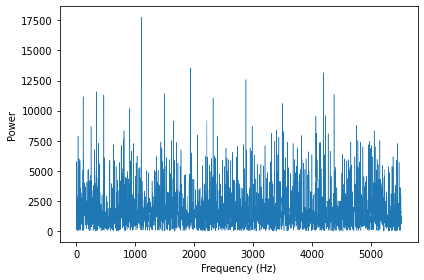

In [26]:
# UU noise has the same power at all frequencies

spectrum.plot_power(linewidth=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

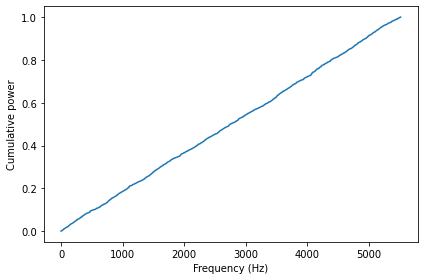

In [27]:
# normalized cumulative sum of power

integ = spectrum.make_integrated_spectrum()
integ.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Cumulative power')

Time resolution (s) 0.023219954648526078
Frequency resolution (Hz) 43.06640625


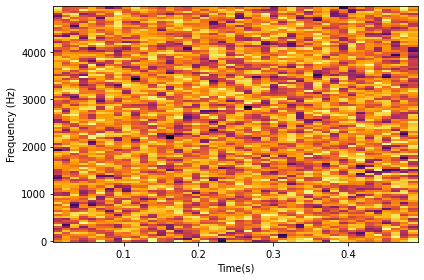

In [28]:
plot_spectrogram(wave, 256)

**Brownian noise**

Brownian noise is generated by adding up a sequence of random steps

In [29]:
from thinkdsp import BrownianNoise

signal = BrownianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
wave.make_audio()

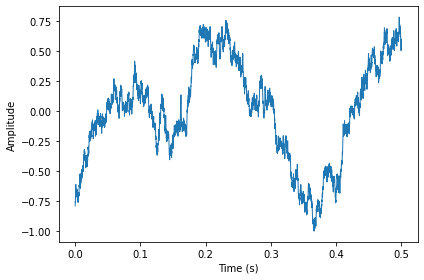

In [30]:
wave.plot(linewidth=1)
decorate(xlabel='Time (s)',
         ylabel='Amplitude')

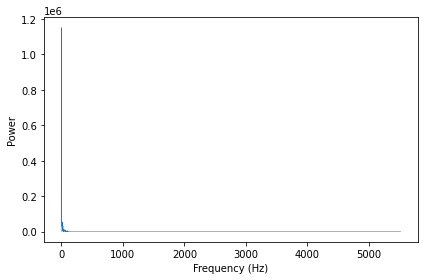

In [31]:
# power at linear scale

spectrum = wave.make_spectrum()
spectrum.plot_power(linewidth=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

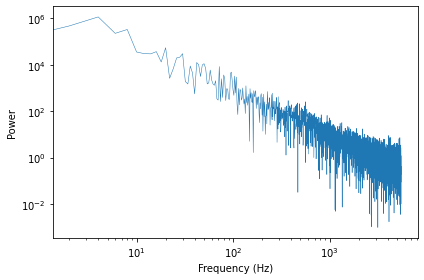

In [32]:
# take a look at log scale
spectrum.hs[0] = 0

spectrum.plot_power(linewidth=0.5)

loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

Time resolution (s) 0.023219954648526078
Frequency resolution (Hz) 43.06640625


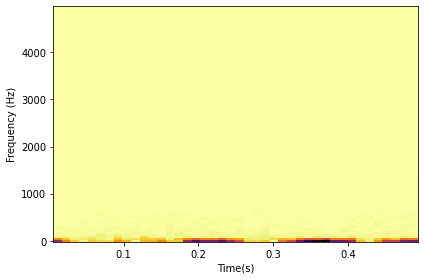

In [33]:
plot_spectrogram(wave, 256)

**Pink Noise**

Pink noise is characterized by a parameter Beta

In [34]:
from thinkdsp import PinkNoise

In [35]:
signal = PinkNoise(beta=0)
wave = signal.make_wave(duration=0.5)
wave.make_audio()

In [36]:
signal = PinkNoise(beta=1)
wave = signal.make_wave(duration=0.5)
wave.make_audio()

In [37]:
signal = PinkNoise(beta=2)
wave = signal.make_wave(duration=0.5)
wave.make_audio()

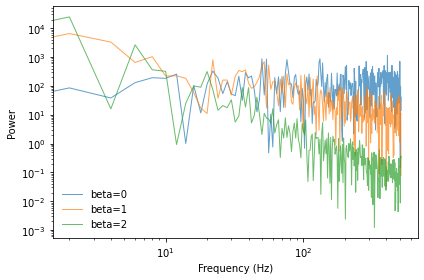

In [38]:
betas = [0, 1, 2]

for beta in betas:
    signal = PinkNoise(beta=beta)
    wave = signal.make_wave(duration=0.5, framerate=1024)
    spectrum = wave.make_spectrum()
    spectrum.hs[0] = 0
    label = f'beta={beta}'
    spectrum.plot_power(linewidth=1, alpha=0.7, label=label)
    
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

Time resolution (s) 0.25
Frequency resolution (Hz) 4.0


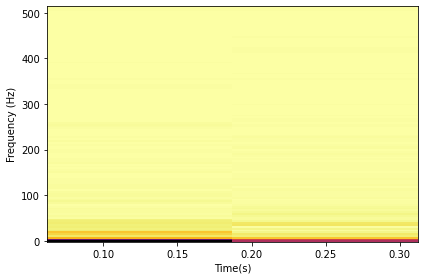

In [39]:
plot_spectrogram(wave, 256)

**Uncorrelated Gaussian noise**

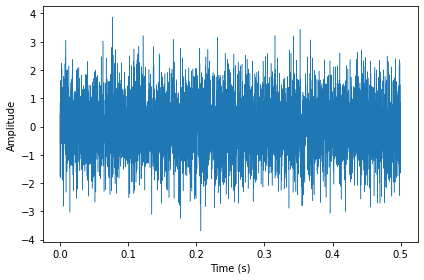

In [40]:
from thinkdsp import UncorrelatedGaussianNoise

signal = UncorrelatedGaussianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
wave.plot(linewidth=0.5)
decorate(xlabel='Time (s)',
         ylabel='Amplitude')

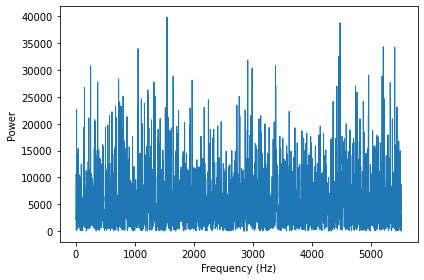

In [41]:
spectrum = wave.make_spectrum()
spectrum.plot_power(linewidth=1)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

Time resolution (s) 0.023219954648526078
Frequency resolution (Hz) 43.06640625


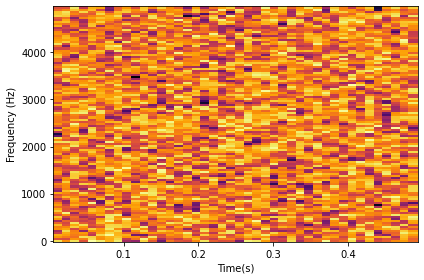

In [42]:
plot_spectrogram(wave, 256)

**JOB FOR TODAY**

In [45]:
cat_audio = read_wave('./cats_dogs/test/cats/cat_3.wav').make_audio()
cat_audio

In [46]:
cat_wave = read_wave('cats_dogs/test/cats/cat_3.wav')

In [48]:
dog_audio = read_wave('cats_dogs/test/dogs/dog_barking_3.wav').make_audio()
dog_audio

In [47]:
dog_wave = read_wave('cats_dogs/test/dogs/dog_barking_3.wav')

Time resolution (s) 0.008
Frequency resolution (Hz) 125.0


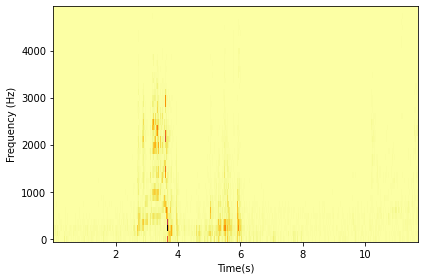

In [49]:
plot_spectrogram(cat_wave, 128)

Time resolution (s) 0.008
Frequency resolution (Hz) 125.0


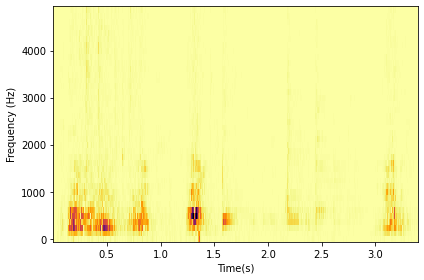

In [50]:
plot_spectrogram(dog_wave, 128)

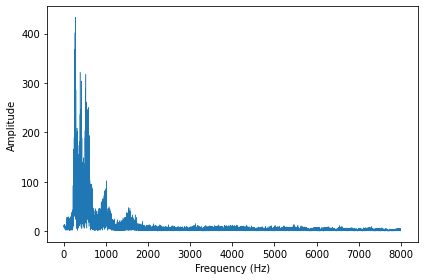

In [51]:
dog_spectrum = dog_wave.make_spectrum()
dog_spectrum.plot(linewidth=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Amplitude')

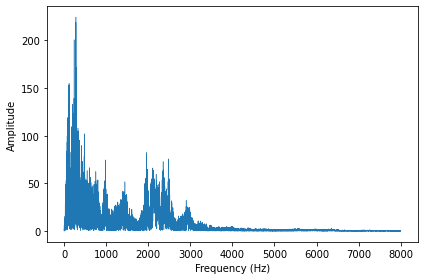

In [52]:
cat_spectrum = cat_wave.make_spectrum()
cat_spectrum.plot(linewidth=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Amplitude')

**TO DO:**

* Find a way to add some noise to cat/dog audio
* Plot spectrograms for cat/dog audio
* Play audio with added noise
* Create spectrogram dataset for dogs/cats